In [31]:
import google.datalab.bigquery as bq
import pandas as pd
import numpy as np

Define query to get data from BigQuery

In [41]:
%%bq query -n wine_query
SELECT * FROM `looker-action-hub.wine_data.all_wines`

Look at sample of query results

In [42]:
%%bq sample --count 10 --query wine_query

wine_id,wine_type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
527,red,9.3,0.655,0.26,2.0,0.096,5.0,35.0,0.99738,3.25,0.42,9.6,5
172,red,6.6,0.57,0.02,2.1,0.115,6.0,16.0,0.99654,3.38,0.69,9.5,5
491,red,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5
535,red,8.8,0.64,0.17,2.9,0.084,25.0,130.0,0.99818,3.23,0.54,9.6,5
678,red,6.4,0.795,0.0,2.2,0.065,28.0,52.0,0.99378,3.49,0.52,11.6,5
297,red,7.1,0.43,0.42,5.5,0.07,29.0,129.0,0.9973,3.42,0.72,10.5,5
34,red,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.23333333333,6
403,red,11.2,0.66,0.24,2.5,0.085,16.0,53.0,0.9993,3.06,0.72,11.0,6
220,red,7.5,0.64,0.0,2.4,0.077,18.0,29.0,0.9965,3.32,0.6,10.0,6
660,red,7.6,0.35,0.6,2.6,0.073,23.0,44.0,0.99656,3.38,0.79,11.1,6


Run query and save results as Pandas dataframe

In [72]:
df = wine_query.execute(output_options=bq.QueryOutput.dataframe()).result()
len(df)

6497

In [73]:
df.describe()

,wine_id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,3249.000000,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1875.666681,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,1.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,1625.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,3249.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,4873.000000,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,6497.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Code "red" and "white" as 0 and 1

In [74]:
df = pd.get_dummies(df, columns=["wine_type"])
df = df.drop('wine_type_white', 1)
df.head()

,wine_id,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type_red
0,791,10.7,0.40,0.48,2.1,0.125,15.0,49.0,0.99800,3.03,0.81,9.7,6,1
1,882,9.8,0.50,0.49,2.6,0.250,5.0,20.0,0.99900,3.31,0.79,10.7,6,1
2,1579,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7,1
3,1580,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7,1
4,224,7.0,0.78,0.08,2.0,0.093,10.0,19.0,0.99560,3.40,0.47,10.0,5,1


Create synthetic features

In [75]:
df["sugar_to_acidity_ratio"] = (
    df["residual_sugar"] /
    df["fixed_acidity"])

Look at histograms

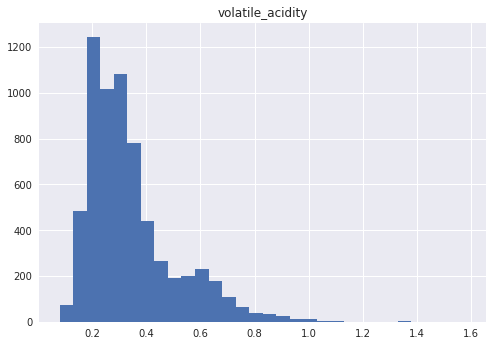

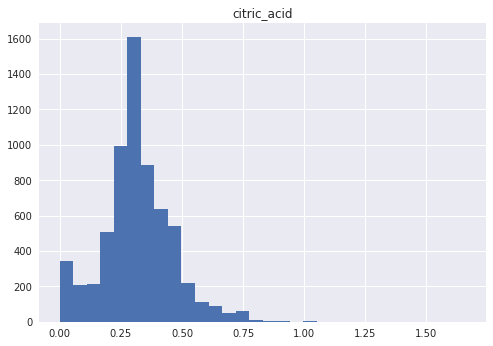

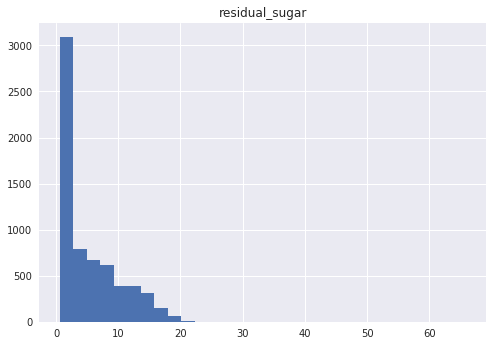

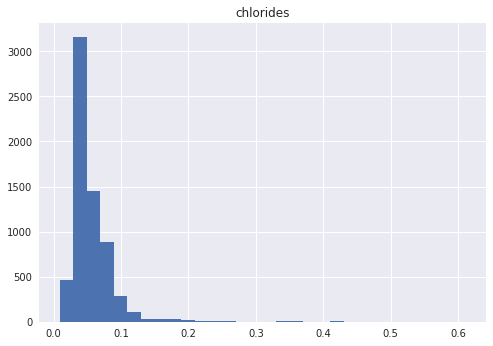

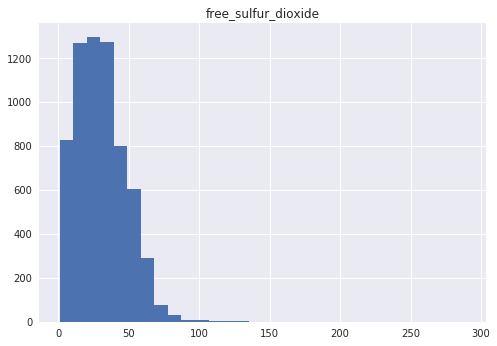

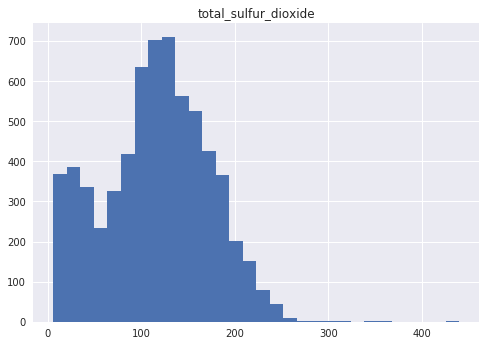

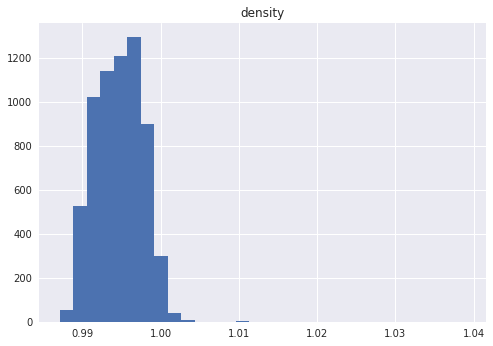

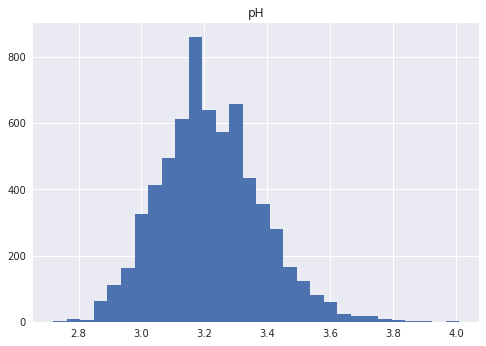

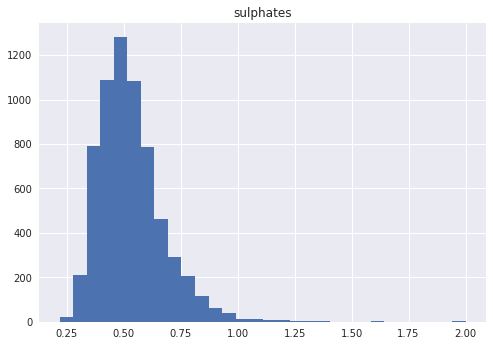

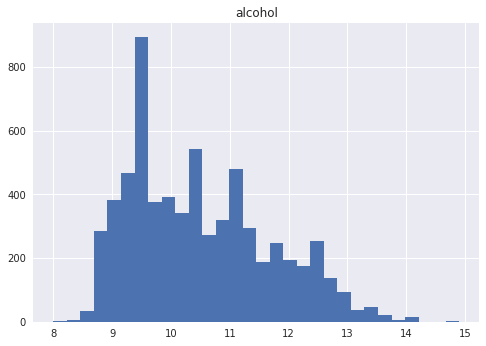

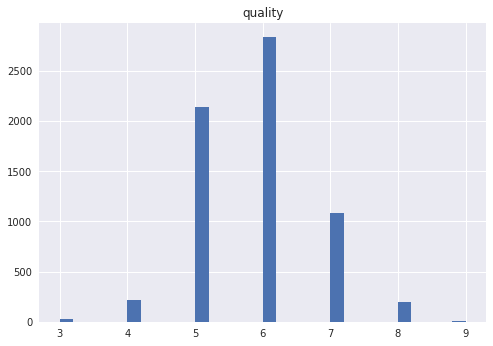

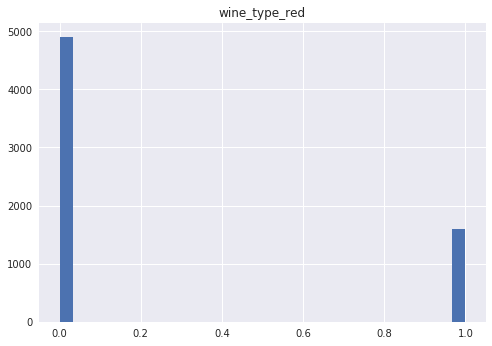

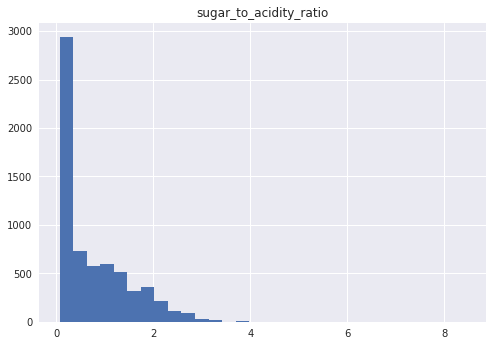

In [76]:
names = list(df)
for i in range(2, len(names)):
  df.hist(names[i], bins=30)

Remomve a few agregious outliers

In [77]:
df = df[np.abs(df.volatile_acidity-df.volatile_acidity.mean())<=(3*df.volatile_acidity.std())]
df = df[np.abs(df.citric_acid-df.citric_acid.mean())<=(3*df.citric_acid.std())]
df = df[np.abs(df.residual_sugar-df.residual_sugar.mean())<=(3*df.residual_sugar.std())]
df = df[np.abs(df.chlorides-df.chlorides.mean())<=(3*df.chlorides.std())]
df = df[np.abs(df.free_sulfur_dioxide-df.free_sulfur_dioxide.mean())<=(3*df.free_sulfur_dioxide.std())]
df = df[np.abs(df.density-df.density.mean())<=(3*df.density.std())]
df = df[np.abs(df.sulphates-df.sulphates.mean())<=(3*df.sulphates.std())]
df = df[np.abs(df.sugar_to_acidity_ratio-df.sugar_to_acidity_ratio.mean())<=(3*df.sugar_to_acidity_ratio.std())]

In [78]:
len(df)

6111

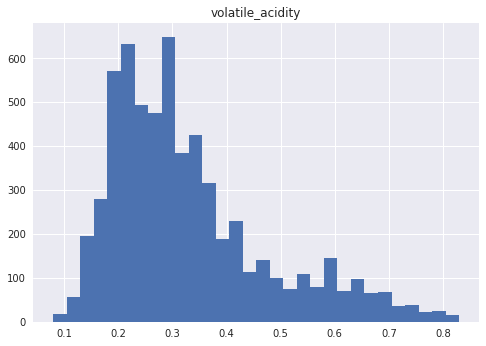

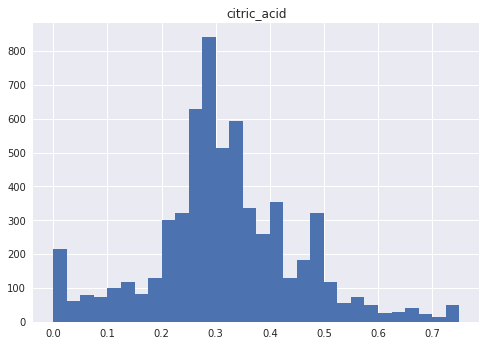

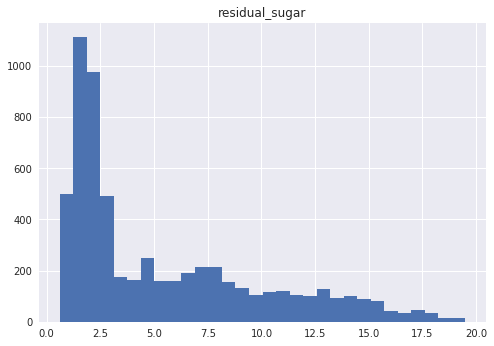

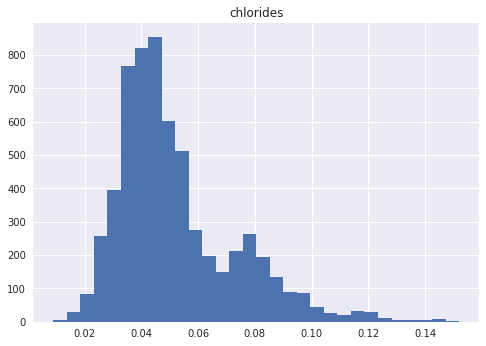

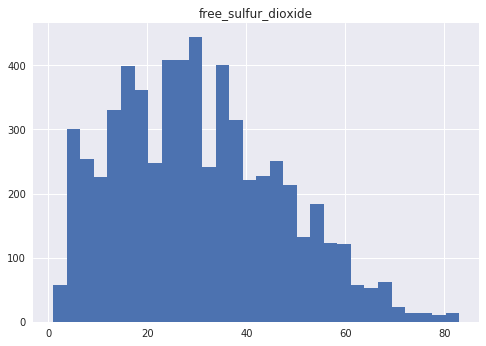

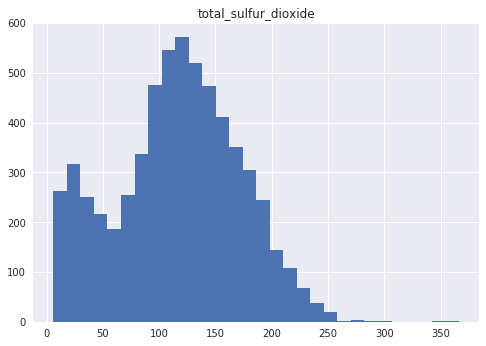

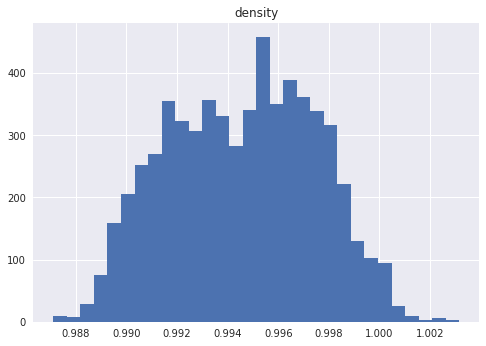

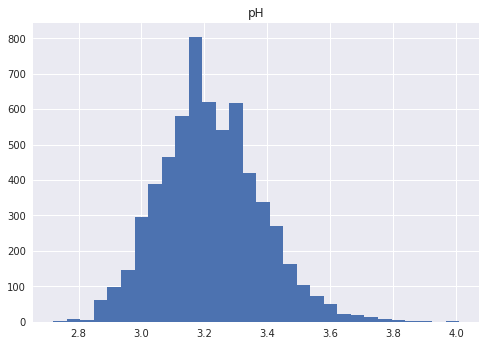

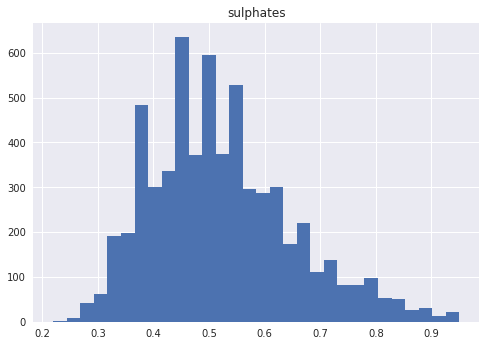

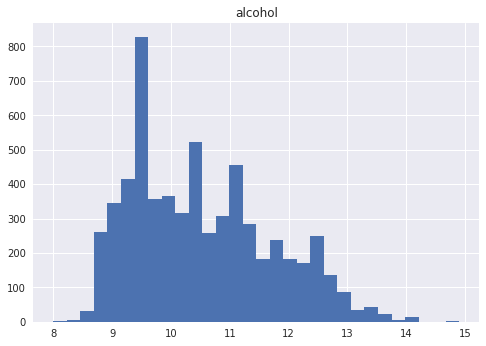

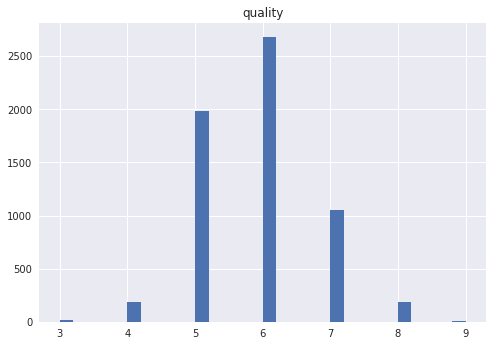

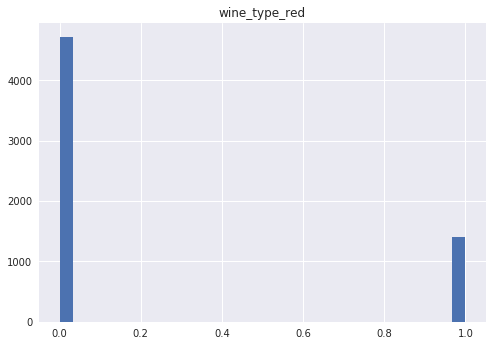

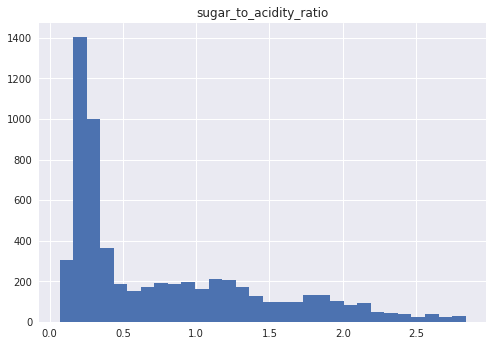

In [79]:
names = list(df)
for i in range(2, len(names)):
  df.hist(names[i], bins=30)

In [80]:
names

[u'wine_id',
 u'fixed_acidity',
 u'volatile_acidity',
 u'citric_acid',
 u'residual_sugar',
 u'chlorides',
 u'free_sulfur_dioxide',
 u'total_sulfur_dioxide',
 u'density',
 u'pH',
 u'sulphates',
 u'alcohol',
 u'quality',
 u'wine_type_red',
 'sugar_to_acidity_ratio']

Write csv

In [81]:
df.to_csv('wine_data.csv', sep=',', index=False)